In [1]:
import pandas as pd
import matplotlib.image as img
import matplotlib.pyplot as plt
photo=img.imread(r"C:\Users\lanmo\Videos\Без имени.png")
photo = photo[:, :, :3]
photo.shape
import random
random.seed(0)

In [6]:
print(photo)

[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


In [2]:
from scipy.cluster.vq import kmeans,vq,whiten
import seaborn as sns

In [3]:
r = []
g = []
b = []
for row in photo:
    for pixel in row:
        temp_r,temp_g,temp_b = pixel
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)


In [4]:
data= pd.DataFrame({
    'red':r,
    'green':g,
    'blue':b
})
data.head()

,red,green,blue
0,1.0,1.0,1.0
1,1.0,1.0,1.0
2,1.0,1.0,1.0
3,1.0,1.0,1.0
4,1.0,1.0,1.0


In [5]:
data[['red_scal','green_scal','blue_scal']] = whiten(data)

In [6]:
data

,red,green,blue,red_scal,green_scal,blue_scal
0,1.0,1.0,1.0,10.306679,4.809028,5.240209
1,1.0,1.0,1.0,10.306679,4.809028,5.240209
2,1.0,1.0,1.0,10.306679,4.809028,5.240209
3,1.0,1.0,1.0,10.306679,4.809028,5.240209
4,1.0,1.0,1.0,10.306679,4.809028,5.240209
...,...,...,...,...,...,...
40774,1.0,1.0,1.0,10.306679,4.809028,5.240209
40775,1.0,1.0,1.0,10.306679,4.809028,5.240209
40776,1.0,1.0,1.0,10.306679,4.809028,5.240209
40777,1.0,1.0,1.0,10.306679,4.809028,5.240209


In [7]:
data.shape


(40779, 6)

<Axes: xlabel='num_clust', ylabel='distortions'>

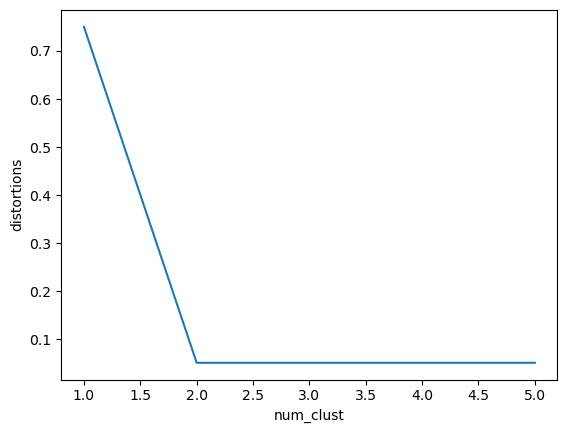

In [8]:
error = []
cluster = range(1,6)
for i in cluster:
    centroid,j = kmeans(data[['red_scal','green_scal','blue_scal']],i,seed = 0)
    error.append(j)
data_error = pd.DataFrame({'num_clust':cluster,
                           'distortions':error
                          })
sns.lineplot(x='num_clust',y='distortions', data = data_error)

In [18]:
colors = [] 
r_std,g_std,b_std = data[['red','green','blue']].std()
centroid,_ = kmeans(data[['red_scal','green_scal','blue_scal']],2,seed = 0)
for center in centroid:
    scaled_r,scaled_g,scaled_b = center
    colors.append((scaled_r * r_std,scaled_g * g_std,scaled_b* b_std)) # тут на 255 делить не нужно так как уже проскалировано

In [19]:
print(colors)

[(0.547206714204652, 0.029703038893367006, 0.10951351715936397), (0.999148980079255, 0.9985856967521585, 0.9979101419691006)]


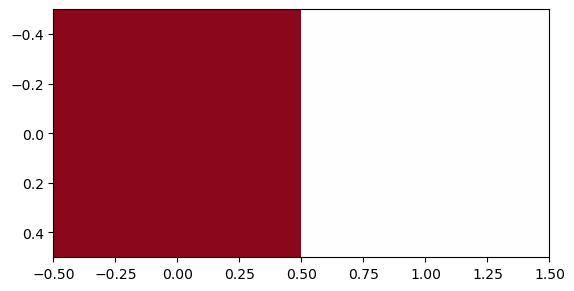

In [20]:
plt.imshow([colors])
plt.show()